In [2]:
hp = pd.read_csv('/kaggle/input/mobile-price-classification/train.csv')

In [3]:
hp.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
hp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [5]:
hp.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [16]:
hp['price_range'].unique()

array([1, 2, 3, 0])

In [18]:
hp.shape

(2000, 21)

In [22]:
hp.duplicated().any()

False

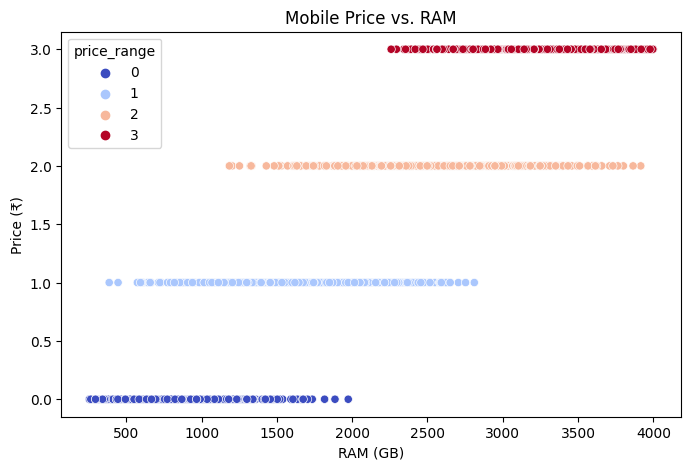

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming df contains 'Price' and 'RAM' columns
plt.figure(figsize=(8, 5))
sns.scatterplot(x=hp['ram'], y=hp['price_range'], hue=hp['price_range'], palette='coolwarm')
plt.xlabel("RAM (GB)")
plt.ylabel("Price (₹)")
plt.title("Mobile Price vs. RAM")
plt.show()


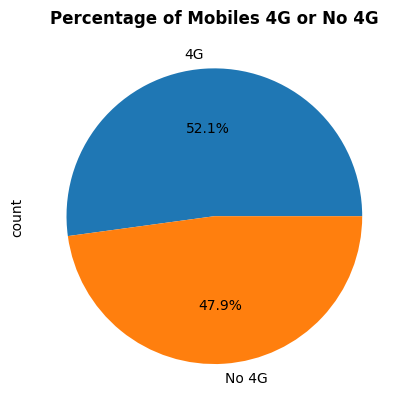

In [32]:
four_g = hp['four_g'].value_counts()
plt.title('Percentage of Mobiles 4G or No 4G', weight='bold')
four_g.plot.pie(autopct="%.1f%%", labels=['4G', 'No 4G'])
plt.show()

In [35]:
X = hp.drop('price_range', axis = 1)
y = hp['price_range']

In [36]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.33, random_state=100)

In [45]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=10)

In [46]:
knn.score(X_test,y_test)

0.9196969696969697

In [49]:
from sklearn.metrics import classification_report,confusion_matrix

pred = knn.predict(X_test)
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97       178
           1       0.88      0.93      0.90       163
           2       0.87      0.86      0.87       161
           3       0.97      0.90      0.93       158

    accuracy                           0.92       660
   macro avg       0.92      0.92      0.92       660
weighted avg       0.92      0.92      0.92       660



In [51]:
matrix = confusion_matrix(y_test, pred)
matrix

array([[175,   3,   0,   0],
       [  8, 151,   4,   0],
       [  0,  17, 139,   5],
       [  0,   0,  16, 142]])

<Axes: >

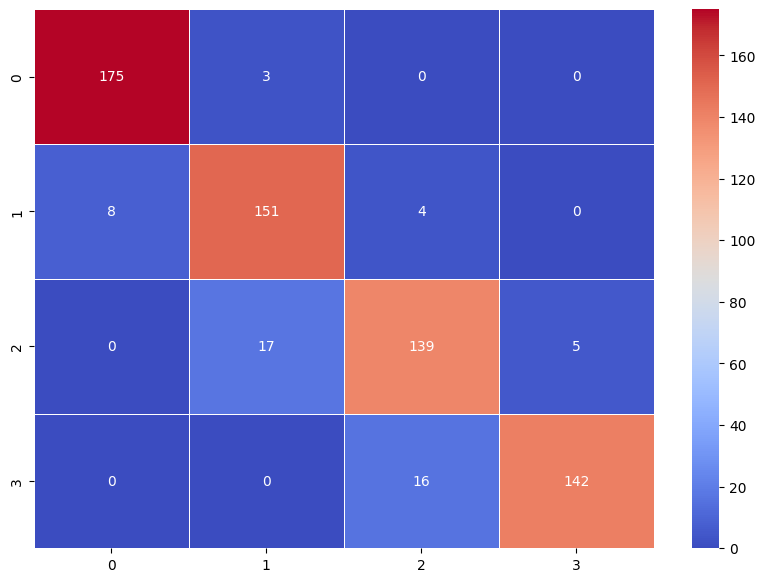

In [56]:
plt.figure(figsize = (10,7))
sns.heatmap(matrix, annot = True, cmap="coolwarm", linewidths=.5, fmt='g')